In [ ]:
import pandas as pd
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Path to the zip file
zip_path = "/content/individual+household+electric+power+consumption.zip"

# Open the zip file
with zipfile.ZipFile(zip_path) as z:
    # List all files inside the zip
    print(z.namelist())  # e.g., ['household_power_consumption.txt']

    # Read the actual text file inside the zip
    with z.open("household_power_consumption.txt") as file:
        df = pd.read_csv(file, sep=';', low_memory=False)

print(df.head())


['household_power_consumption.txt']
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [ ]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
df.shape

(2075259, 9)

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Create time features
df['hour'] = df['DateTime'].dt.hour
df['day'] = df['DateTime'].dt.day
df['weekday'] = df['DateTime'].dt.weekday

# Set as index for resampling or plotting
df = df.set_index('DateTime')


In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,weekday
DateTime,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,17,16,5
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,17,16,5
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,17,16,5
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,17,16,5
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,17,16,5


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'hour', 'day', 'weekday'],
      dtype='object')

In [ ]:
df.dtypes

,0
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64
hour,int32
day,int32
weekday,int32


In [ ]:
# Replace "?" with NaN and convert numeric columns to float
df.replace("?", np.nan, inplace=True)
for col in df.columns:
    df[col] = df[col].astype(float)

In [ ]:
df['hour'] = df['hour'].astype('int32')
df['day'] = df['day'].astype('int32')
df['weekday'] = df['weekday'].astype('int32')


In [ ]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
hour,int32
day,int32
weekday,int32


In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,weekday
DateTime,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,5
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,5
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,5
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,5
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,5


In [ ]:
df.isnull().sum()

,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
hour,0
day,0
weekday,0


In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
Global_active_power,1.251844
Global_reactive_power,1.251844
Voltage,1.251844
Global_intensity,1.251844
Sub_metering_1,1.251844
Sub_metering_2,1.251844
Sub_metering_3,1.251844
hour,0.000000
day,0.000000
weekday,0.000000


In [ ]:
df.fillna(method='ffill', inplace=True)


In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
Global_active_power,0.0
Global_reactive_power,0.0
Voltage,0.0
Global_intensity,0.0
Sub_metering_1,0.0
Sub_metering_2,0.0
Sub_metering_3,0.0
hour,0.0
day,0.0
weekday,0.0


### Exploratory Data Analysis


#### Correlation Heatmap

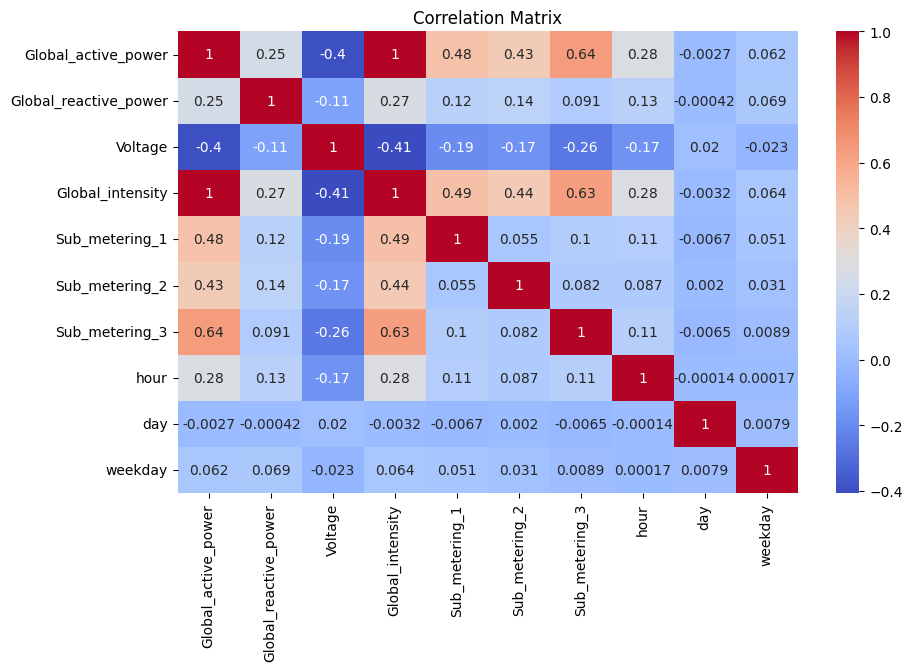

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df.drop(['Global_intensity', 'day', 'weekday'], axis=1, inplace=True)


In [ ]:
print(df.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour'],
      dtype='object')


In [ ]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
hour,int32


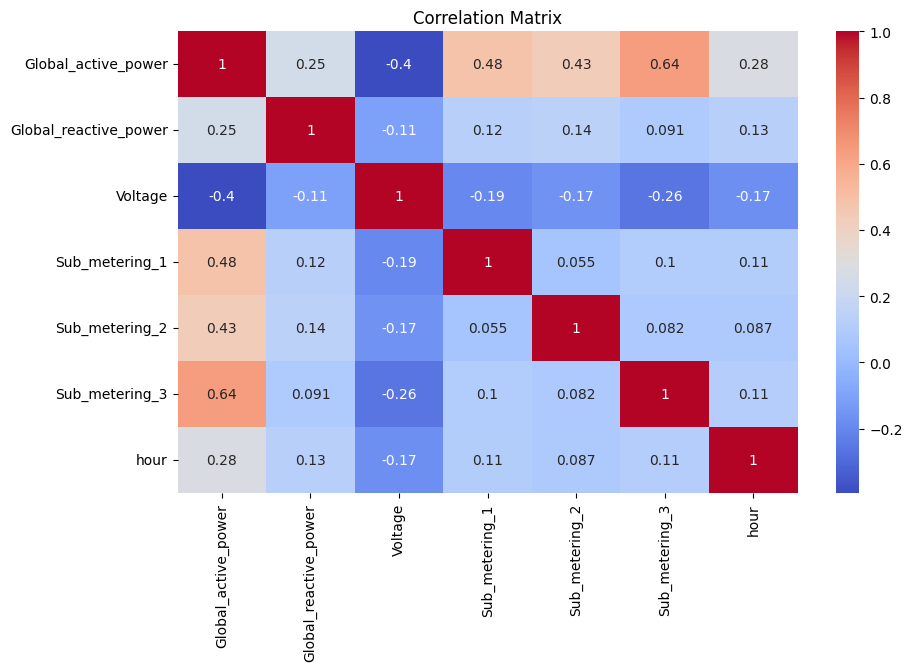

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Time Series Plot of Power Usage

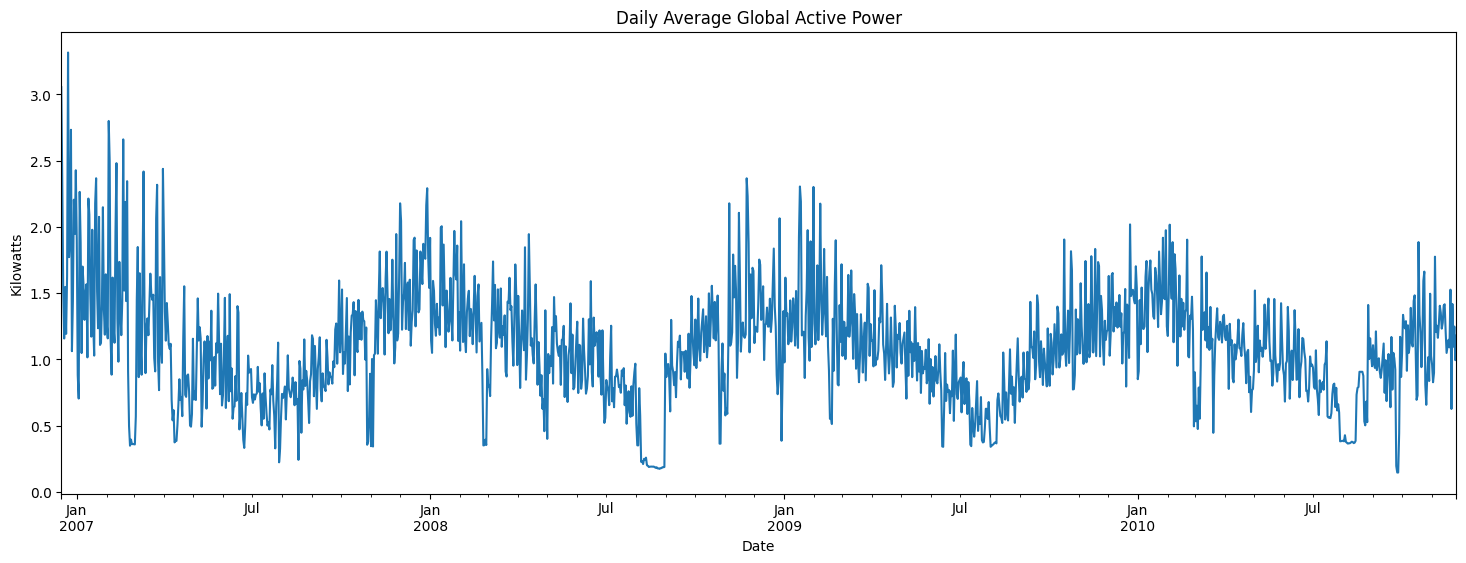

In [ ]:
daily_avg = df['Global_active_power'].resample('D').mean()

daily_avg.plot(figsize=(18, 6), title='Daily Average Global Active Power')
plt.ylabel('Kilowatts')
plt.xlabel('Date')
plt.show()


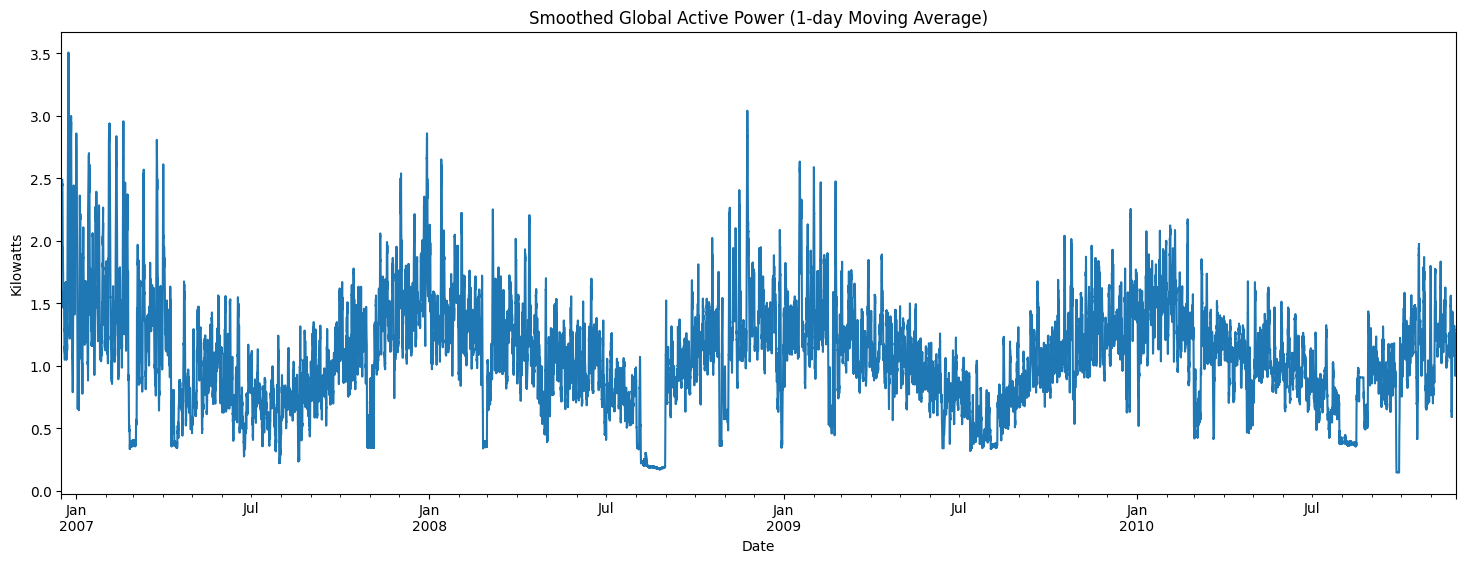

In [ ]:
rolling_avg = df['Global_active_power'].rolling(window=1440).mean()  # 1440 = 1 day if per minute

rolling_avg.plot(figsize=(18, 6), title='Smoothed Global Active Power (1-day Moving Average)')
plt.ylabel('Kilowatts')
plt.xlabel('Date')
plt.show()


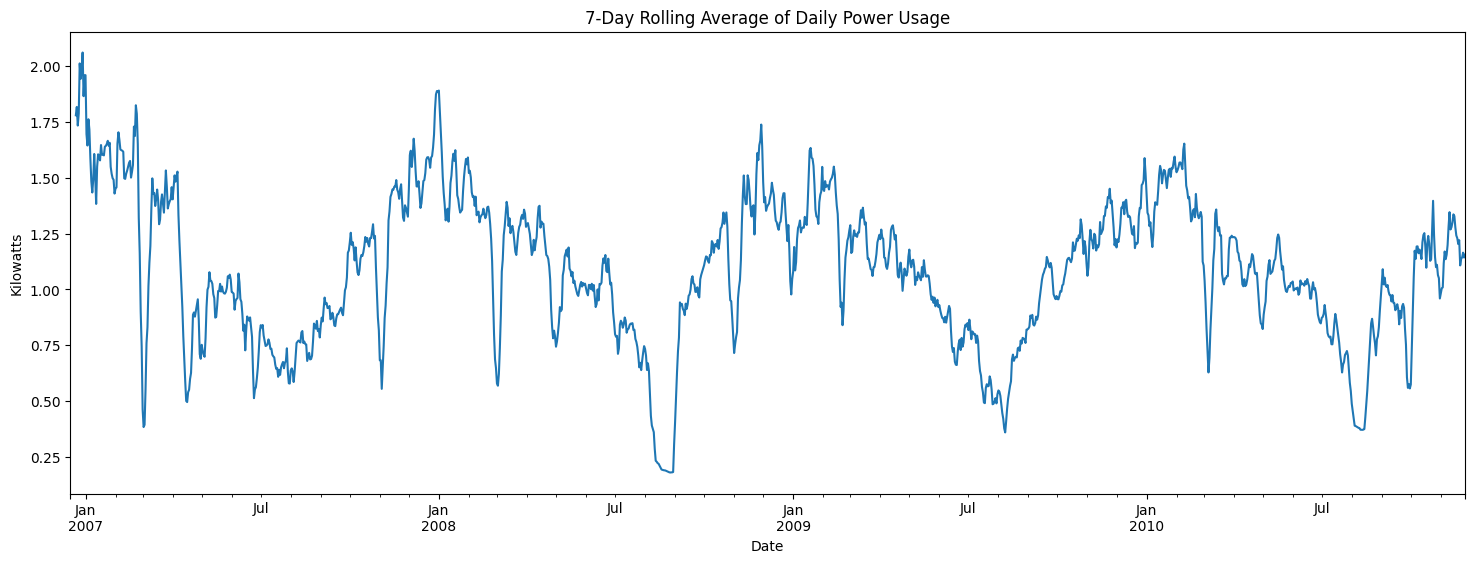

In [ ]:
daily_avg.rolling(7).mean().plot(figsize=(18, 6), title='7-Day Rolling Average of Daily Power Usage')
plt.ylabel('Kilowatts')
plt.xlabel('Date')
plt.show()


#### Average Usage by Month

In [ ]:
# Add month
df['month'] = df.index.month

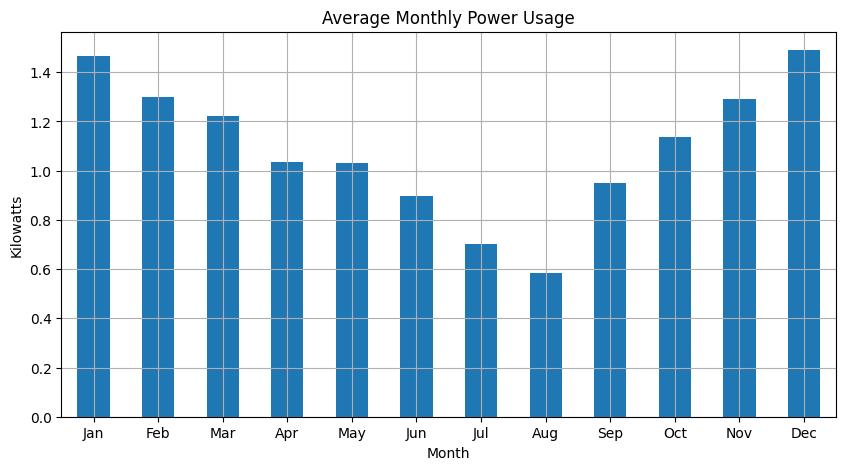

In [ ]:
# Monthly average
monthly_avg = df.groupby('month')['Global_active_power'].mean()

monthly_avg.plot(kind='bar', figsize=(10, 5), title='Average Monthly Power Usage')
plt.ylabel('Kilowatts')
plt.xlabel('Month')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=0)
plt.grid(True)
plt.show()

#### Average Usage by Weekday

In [ ]:

df['weekday'] = df.index.weekday  # 0 = Monday, 6 = Sunday

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,month,weekday
DateTime,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,17,12,5
2006-12-16 17:25:00,5.360,0.436,233.63,0.0,1.0,16.0,17,12,5
2006-12-16 17:26:00,5.374,0.498,233.29,0.0,2.0,17.0,17,12,5
2006-12-16 17:27:00,5.388,0.502,233.74,0.0,1.0,17.0,17,12,5
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,17,12,5


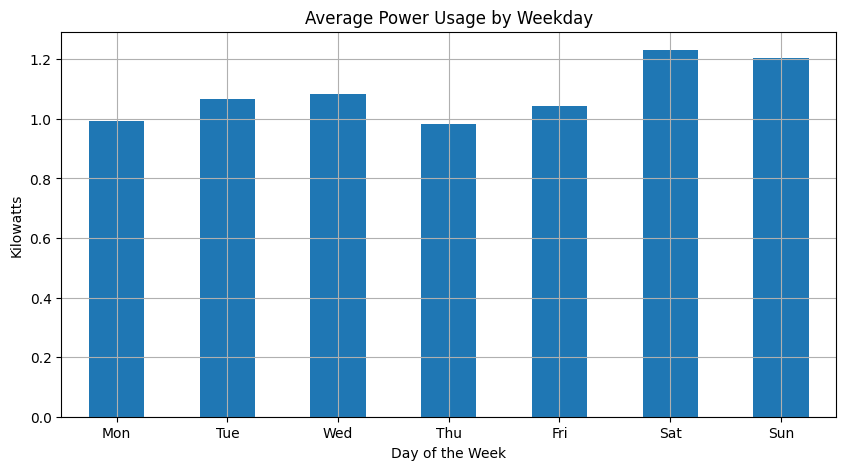

In [ ]:
weekday_avg = df.groupby('weekday')['Global_active_power'].mean()

weekday_avg.plot(kind='bar', figsize=(10, 5), title='Average Power Usage by Weekday')
plt.ylabel('Kilowatts')
plt.xlabel('Day of the Week')
plt.xticks(ticks=range(7), labels=[
    'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'
], rotation=0)
plt.grid(True)
plt.show()

#### Average Usage by Hour of the Day

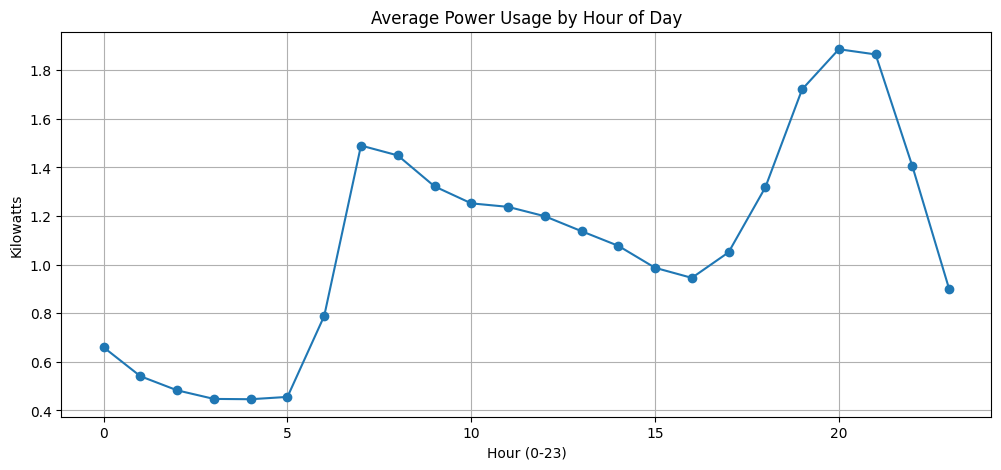

In [ ]:
hourly_avg = df.groupby('hour')['Global_active_power'].mean()

hourly_avg.plot(kind='line', marker='o', figsize=(12, 5), title='Average Power Usage by Hour of Day')
plt.ylabel('Kilowatts')
plt.xlabel('Hour (0-23)')
plt.grid(True)
plt.show()

#### Correlation Heat Map

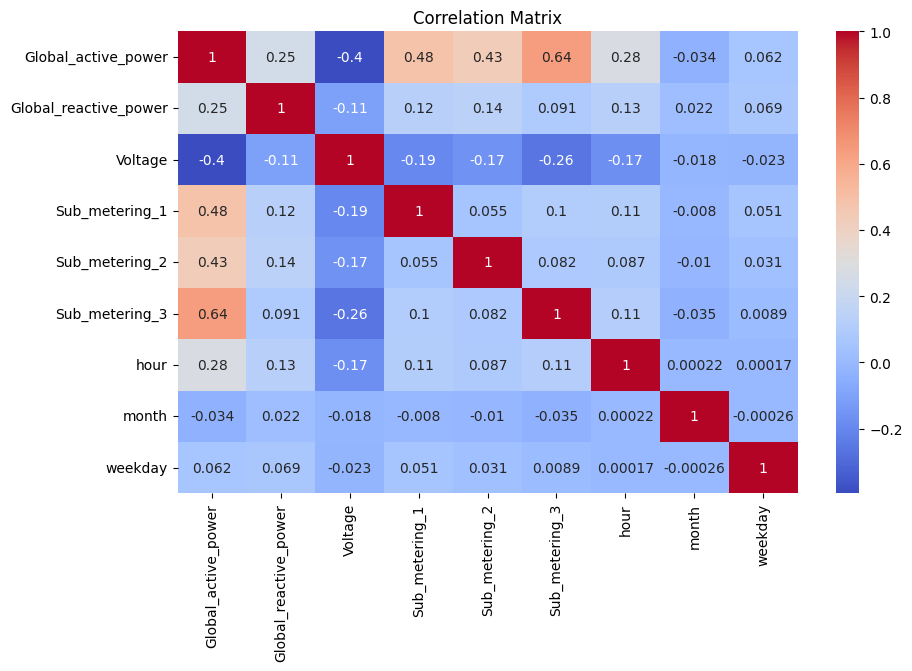

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df.drop(['month', 'weekday'], axis=1, inplace=True)

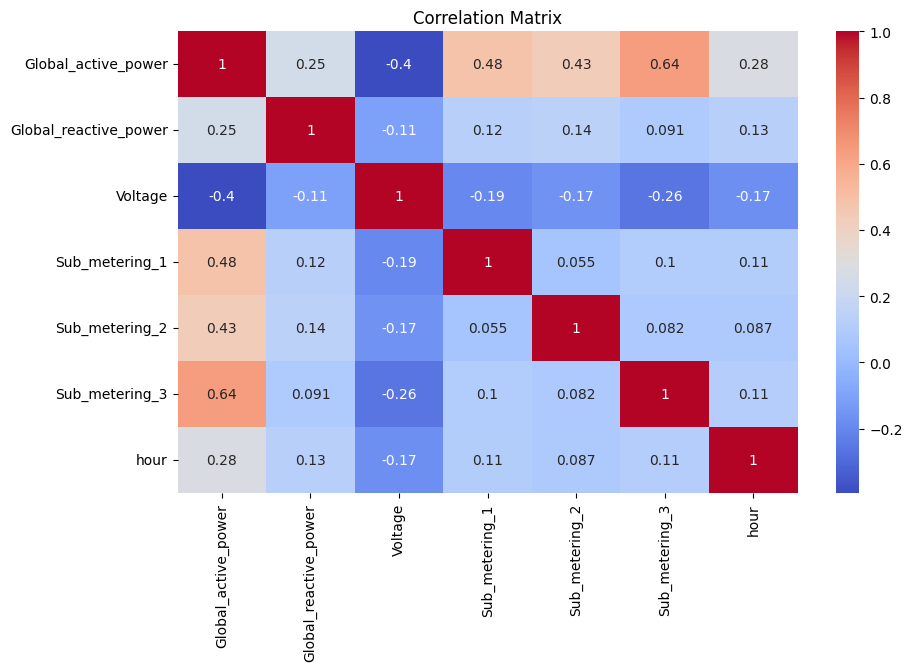

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,17
2006-12-16 17:25:00,5.360,0.436,233.63,0.0,1.0,16.0,17
2006-12-16 17:26:00,5.374,0.498,233.29,0.0,2.0,17.0,17
2006-12-16 17:27:00,5.388,0.502,233.74,0.0,1.0,17.0,17
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,17


#### Histogram of Global Active Power

Right Skewed

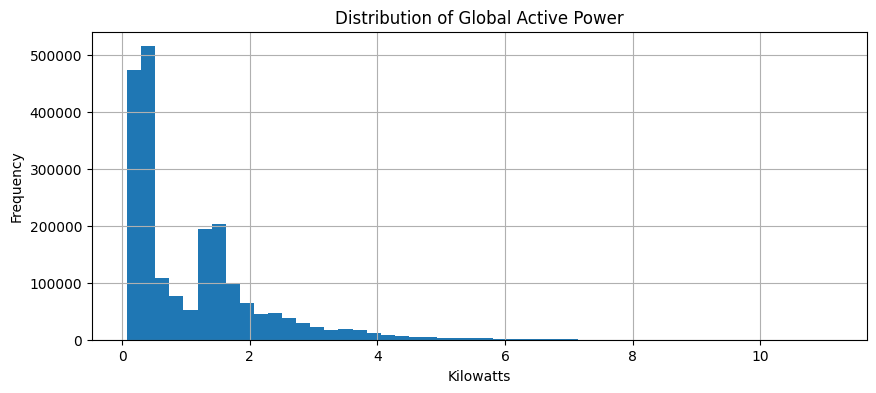

In [ ]:
df["Global_active_power"].hist(bins=50, figsize=(10,4))
plt.title("Distribution of Global Active Power")
plt.xlabel("Kilowatts")
plt.ylabel("Frequency")
plt.show()


#### Removing Outliers

To filter values above a reasonable threshold (say, 6 kW):

In [ ]:
threshold = df['Global_active_power'].quantile(0.99)  # 99th percentile
df = df[df['Global_active_power'] <= threshold]


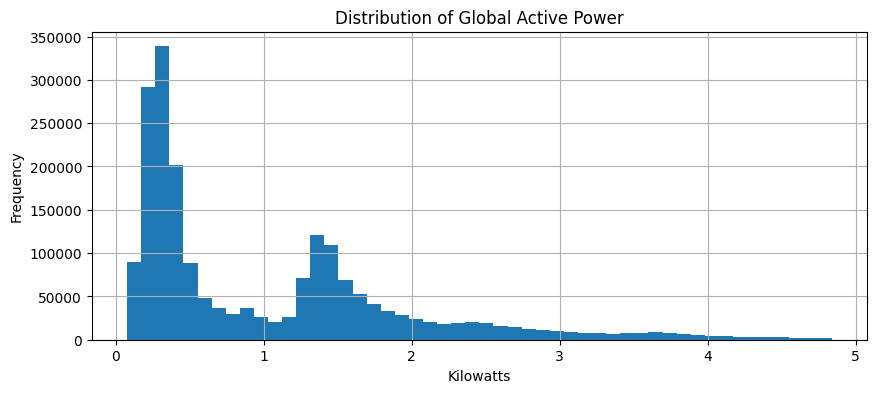

In [ ]:
df["Global_active_power"].hist(bins=50, figsize=(10,4))
plt.title("Distribution of Global Active Power")
plt.xlabel("Kilowatts")
plt.ylabel("Frequency")
plt.show()

#### Normalize the Distribution

Log Transformation (best for right-skewed)

In [ ]:

df['Global_active_power_log'] = np.log1p(df['Global_active_power'])  # log(1 + x)


<Axes: >

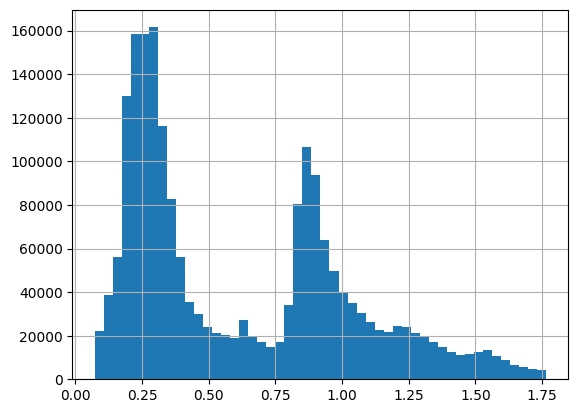

In [ ]:
df['Global_active_power_log'].hist(bins=50)


Square Root Transformation

In [ ]:
df['Global_active_power_sqrt'] = np.sqrt(df['Global_active_power'])


<Axes: >

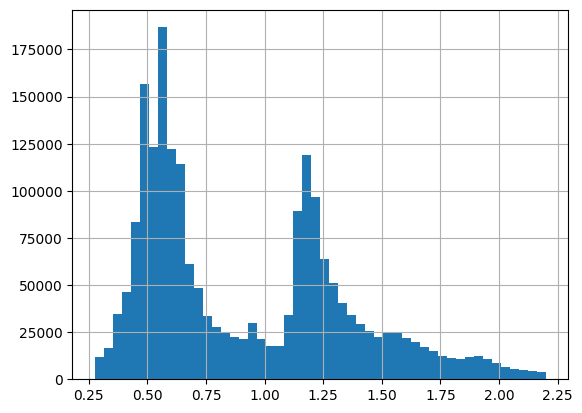

In [ ]:
df['Global_active_power_sqrt'].hist(bins=50)


Box-Cox Transformation (requires strictly positive values)

In [ ]:
from scipy import stats
df['Global_active_power_boxcox'], _ = stats.boxcox(df['Global_active_power'])


<Axes: >

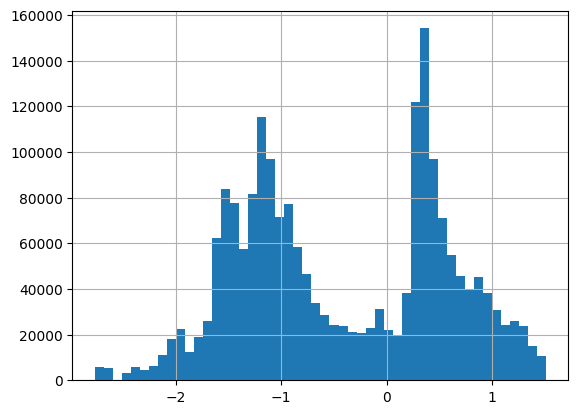

In [ ]:
df['Global_active_power_boxcox'].hist(bins=50)

#### Boxplot to Detect Outliers by Hour

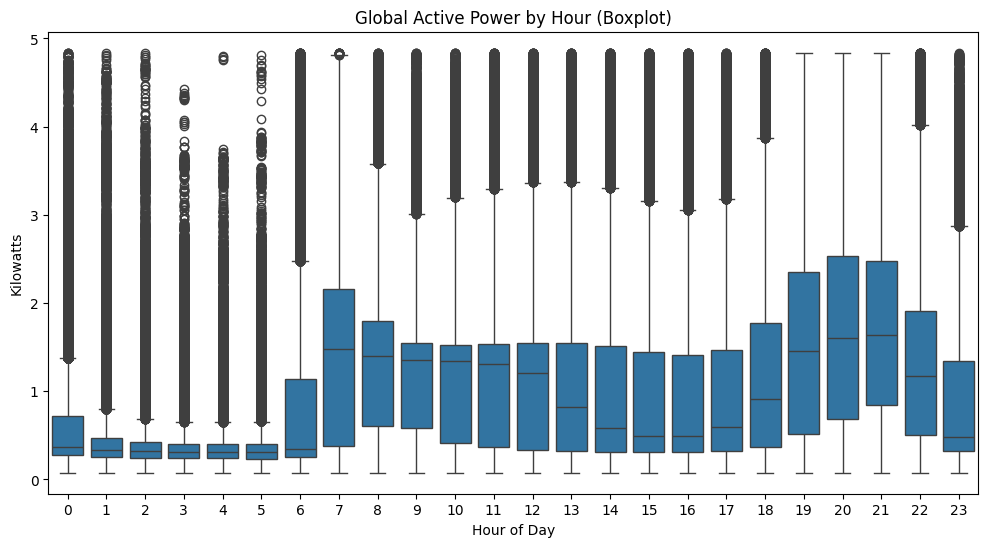

In [ ]:
df['hour'] = df.index.hour
plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='Global_active_power', data=df)
plt.title("Global Active Power by Hour (Boxplot)")
plt.xlabel("Hour of Day")
plt.ylabel("Kilowatts")
plt.show()


#### Detect and Remove Outliers Using IQR (Boxplot Method)

In [ ]:
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filter out outliers
df_no_outliers = df[(df['Global_active_power'] >= lower_bound) & (df['Global_active_power'] <= upper_bound)]


 ## Hybrid strategy:

 Keep moderate outliers, but remove only extreme ones (e.g., > 3 * IQR)

Visualize the Cleaned Distribution

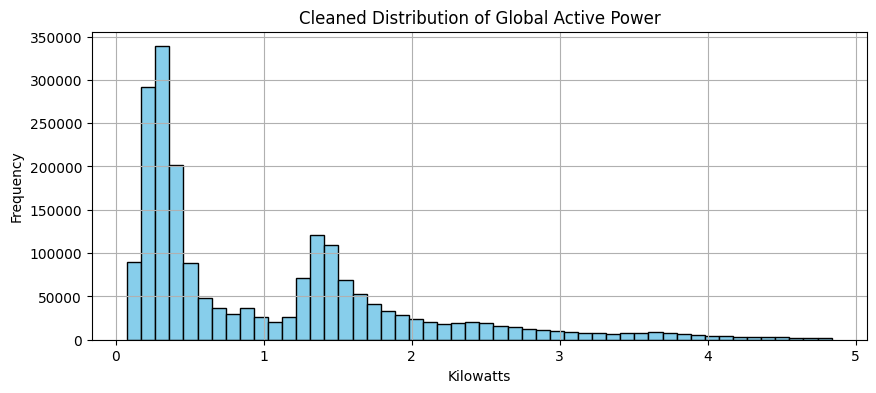

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df_no_outliers['Global_active_power'], bins=50, color='skyblue', edgecolor='black')
plt.title('Cleaned Distribution of Global Active Power')
plt.xlabel('Kilowatts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


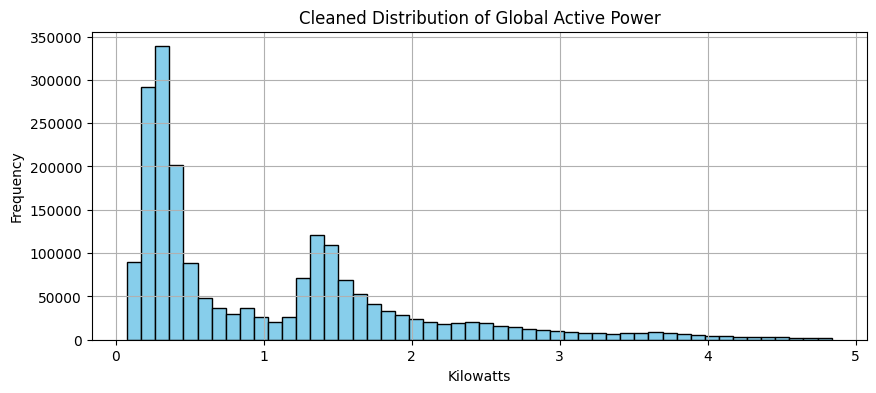

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['Global_active_power'], bins=50, color='skyblue', edgecolor='black')
plt.title('Cleaned Distribution of Global Active Power')
plt.xlabel('Kilowatts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Normalize the Distribution

 Log Transformation

In [ ]:
df_no_outliers['Global_active_power_log'] = np.log1p(df_no_outliers['Global_active_power'])  # log(x + 1)


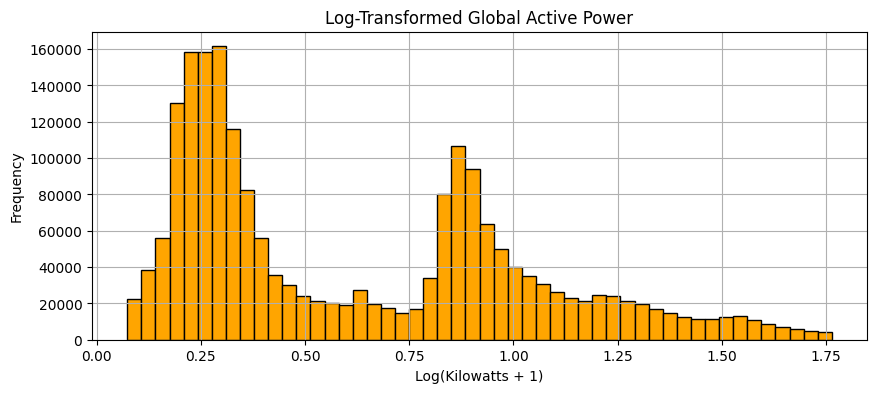

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df_no_outliers['Global_active_power_log'], bins=50, color='orange', edgecolor='black')
plt.title('Log-Transformed Global Active Power')
plt.xlabel('Log(Kilowatts + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


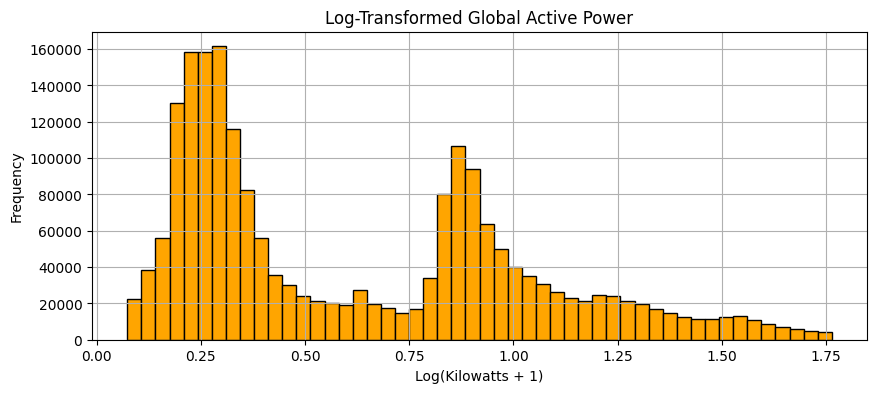

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['Global_active_power_log'], bins=50, color='orange', edgecolor='black')
plt.title('Log-Transformed Global Active Power')
plt.xlabel('Log(Kilowatts + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df_no_outliers.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour',
       'Global_active_power_log', 'Global_active_power_sqrt',
       'Global_active_power_boxcox'],
      dtype='object')

In [ ]:
df_no_outliers.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
hour,int32
Global_active_power_log,float64
Global_active_power_sqrt,float64
Global_active_power_boxcox,float64


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour',
       'Global_active_power_log', 'Global_active_power_sqrt',
       'Global_active_power_boxcox'],
      dtype='object')

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,Global_active_power_log,Global_active_power_sqrt,Global_active_power_boxcox
DateTime,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,17,1.651731,2.053290,1.384183
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,17,1.540302,1.914680,1.254398
2006-12-16 17:29:00,3.520,0.522,235.02,0.0,2.0,17.0,17,1.508512,1.876166,1.216481
2006-12-16 17:30:00,3.702,0.520,235.09,0.0,1.0,17.0,17,1.547988,1.924058,1.263503
2006-12-16 17:31:00,3.700,0.520,235.22,0.0,1.0,17.0,17,1.547563,1.923538,1.263000


### 🛠 Feature Engineering

In [ ]:
# Day of week (0 = Monday, 6 = Sunday)
df_no_outliers['day_of_week'] = df_no_outliers.index.dayofweek

# Weekend indicator
df_no_outliers['is_weekend'] = df_no_outliers['day_of_week'].isin([5, 6]).astype(int)

# Hour is already present in our data, so no need to extract it again

# Part of day
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df_no_outliers['part_of_day'] = df_no_outliers['hour'].apply(part_of_day)

# Peak hour indicator
df_no_outliers['is_peak_hour'] = df_no_outliers['hour'].isin([18, 19, 20]).astype(int)

# Month
df_no_outliers['month'] = df_no_outliers.index.month

# Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

df_no_outliers['season'] = df_no_outliers['month'].apply(get_season)

# Daytime indicator (6 AM to 9 PM)
df_no_outliers['is_daytime'] = df_no_outliers['hour'].between(6, 21).astype(int)


In [ ]:
df_no_outliers.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour',
       'Global_active_power_log', 'Global_active_power_sqrt',
       'Global_active_power_boxcox', 'day_of_week', 'is_weekend',
       'part_of_day', 'is_peak_hour', 'month', 'season', 'is_daytime'],
      dtype='object')

In [ ]:
df_no_outliers.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,Global_active_power_log,Global_active_power_sqrt,Global_active_power_boxcox,day_of_week,is_weekend,part_of_day,is_peak_hour,month,season,is_daytime
DateTime,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,17,1.651731,2.053290,1.384183,5,1,evening,0,12,winter,1
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,17,1.540302,1.914680,1.254398,5,1,evening,0,12,winter,1
2006-12-16 17:29:00,3.520,0.522,235.02,0.0,2.0,17.0,17,1.508512,1.876166,1.216481,5,1,evening,0,12,winter,1
2006-12-16 17:30:00,3.702,0.520,235.09,0.0,1.0,17.0,17,1.547988,1.924058,1.263503,5,1,evening,0,12,winter,1
2006-12-16 17:31:00,3.700,0.520,235.22,0.0,1.0,17.0,17,1.547563,1.923538,1.263000,5,1,evening,0,12,winter,1


### One-Hot-Encoding

In [ ]:
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['part_of_day', 'season'], drop_first=True)


In [ ]:
df_no_outliers.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,Global_active_power_log,Global_active_power_sqrt,Global_active_power_boxcox,...,is_weekend,is_peak_hour,month,is_daytime,part_of_day_evening,part_of_day_morning,part_of_day_night,season_spring,season_summer,season_winter
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,17,1.651731,2.053290,1.384183,...,1,0,12,1,True,False,False,False,False,True
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,17,1.540302,1.914680,1.254398,...,1,0,12,1,True,False,False,False,False,True
2006-12-16 17:29:00,3.520,0.522,235.02,0.0,2.0,17.0,17,1.508512,1.876166,1.216481,...,1,0,12,1,True,False,False,False,False,True
2006-12-16 17:30:00,3.702,0.520,235.09,0.0,1.0,17.0,17,1.547988,1.924058,1.263503,...,1,0,12,1,True,False,False,False,False,True
2006-12-16 17:31:00,3.700,0.520,235.22,0.0,1.0,17.0,17,1.547563,1.923538,1.263000,...,1,0,12,1,True,False,False,False,False,True


In [ ]:
df_no_outliers.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour',
       'Global_active_power_log', 'Global_active_power_sqrt',
       'Global_active_power_boxcox', 'day_of_week', 'is_weekend',
       'is_peak_hour', 'month', 'is_daytime', 'part_of_day_evening',
       'part_of_day_morning', 'part_of_day_night', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [ ]:
df_no_outliers.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,Global_active_power_log,Global_active_power_sqrt,Global_active_power_boxcox,day_of_week,is_weekend,is_peak_hour,month,is_daytime,part_of_day_evening,part_of_day_morning,part_of_day_night,season_spring,season_summer,season_winter
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,17,1.651731,2.053290,1.384183,5,1,0,12,1,True,False,False,False,False,True
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,17,1.540302,1.914680,1.254398,5,1,0,12,1,True,False,False,False,False,True
2006-12-16 17:29:00,3.520,0.522,235.02,0.0,2.0,17.0,17,1.508512,1.876166,1.216481,5,1,0,12,1,True,False,False,False,False,True
2006-12-16 17:30:00,3.702,0.520,235.09,0.0,1.0,17.0,17,1.547988,1.924058,1.263503,5,1,0,12,1,True,False,False,False,False,True
2006-12-16 17:31:00,3.700,0.520,235.22,0.0,1.0,17.0,17,1.547563,1.923538,1.263000,5,1,0,12,1,True,False,False,False,False,True


### Load

In [ ]:
df_no_outliers.to_parquet("df_no_outliers.parquet", index=False)


### Read

In [ ]:
import pandas as pd
df_no_outliers = pd.read_parquet("df_no_outliers.parquet")


In [ ]:
df_no_outliers.head(2)

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,Global_active_power_log,Global_active_power_sqrt,Global_active_power_boxcox,...,is_weekend,is_peak_hour,month,is_daytime,part_of_day_evening,part_of_day_morning,part_of_day_night,season_spring,season_summer,season_winter
0,4.216,0.418,234.84,0.0,1.0,17.0,17,1.651731,2.05329,1.384183,...,1,0,12,1,True,False,False,False,False,True
1,3.666,0.528,235.68,0.0,1.0,17.0,17,1.540302,1.91468,1.254398,...,1,0,12,1,True,False,False,False,False,True


In [ ]:
print(X_train.dtypes)


Global_reactive_power    float64
Voltage                  float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
hour                       int32
day_of_week                int32
is_weekend                 int64
is_peak_hour               int64
month                      int32
is_daytime                 int64
part_of_day_evening         bool
part_of_day_morning         bool
part_of_day_night           bool
season_spring               bool
season_summer               bool
season_winter               bool
dtype: object


### Train Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 🎯 Step 1: Define features and target
target = 'Global_active_power_log'

# Drop the raw and transformed target columns from features
features_to_drop = [
    'Global_active_power',
    'Global_active_power_log',
    'Global_active_power_sqrt',
    'Global_active_power_boxcox'
]

X = df_no_outliers.drop(columns=features_to_drop)
y = df_no_outliers[target]

# 🧪 Step 2: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


### Load

In [ ]:
import pandas as pd

# Save as parquet
X_train.to_parquet("X_train.parquet", index=False)
X_test.to_parquet("X_test.parquet", index=False)
y_train.to_frame().to_parquet("y_train.parquet", index=False)  # Ensure it's a DataFrame
y_test.to_frame().to_parquet("y_test.parquet", index=False)


### Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Dump

In [ ]:
import joblib

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"Linear Regression:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Linear Regression:
MAE  : 0.1361
RMSE: 0.1908
R² Score: 0.7841


### Dump the model

In [ ]:
joblib.dump(model, "linear_model.pkl")


['linear_model.pkl']

## Load Everything Later

In [ ]:
X_train = pd.read_parquet("X_train.parquet")
X_test = pd.read_parquet("X_test.parquet")
y_train = pd.read_parquet("y_train.parquet").squeeze()  # Convert back to Series
y_test = pd.read_parquet("y_test.parquet").squeeze()

import joblib
scaler = joblib.load("scaler.pkl")
model = joblib.load("linear_model.pkl")


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


Linear Regression:
MAE  : 0.1361
RMSE : 0.1908
R²   : 0.7841


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Much faster configuration for large datasets
rf = RandomForestRegressor(
    n_estimators=50,       # fewer trees
    max_depth=10,          # limit tree depth
    max_samples=0.2,       # use 20% of rows per tree
    n_jobs=-1,             # use all CPU cores
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_samples=0.2, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [ ]:
joblib.dump(rf, "random_forest_model.pkl")


['random_forest_model.pkl']

In [ ]:
rf = joblib.load("random_forest_model.pkl")

rf = joblib.load("random_forest_model.pkl")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = rf.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


MAE : 0.11187443429256987
RMSE: 0.16999648526270866
R²  : 0.8285440954367346


## Cross-Validation for RMSE, R², and MAE for Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [ ]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Define the model
model = RandomForestRegressor(
    max_depth=10,
    max_samples=0.2,
    n_estimators=50,
    n_jobs=-1,
    random_state=42
)

rmse_scores = cross_val_score(
    model,
    X_train, y_train,
    scoring='neg_root_mean_squared_error',  # built-in
    cv=5,
    n_jobs=-1
)

rmse_scores = -rmse_scores  # flip sign

print("CV RMSE scores:", rmse_scores)
print("Mean RMSE     :", np.mean(rmse_scores))
print("Std Dev RMSE  :", np.std(rmse_scores))


CV RMSE scores: [0.16938813 0.17028857 0.16991722 0.16979209 0.16999896]
Mean RMSE     : 0.1698769948982283
Std Dev RMSE  : 0.00029396918063856855


In [ ]:
mae_scorer = make_scorer(mean_absolute_error)

# Define the model
model = RandomForestRegressor(
    max_depth=10,
    max_samples=0.2,
    n_estimators=50,
    n_jobs=-1,
    random_state=42
)

mae_scores = cross_val_score(
    model,
    X_train, y_train,
    scoring=mae_scorer,
    cv=5,
    n_jobs=-1
)

print("CV MAE scores:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))
print("Std Dev MAE:", np.std(mae_scores))


CV MAE scores: [0.11155928 0.11200435 0.11189011 0.11158657 0.11180246]
Mean MAE: 0.1117685522506747
Std Dev MAE: 0.00017230123561873828


In [ ]:
# Define the model
model = RandomForestRegressor(
    max_depth=10,
    max_samples=0.2,
    n_estimators=50,
    n_jobs=-1,
    random_state=42
)

r2_scores = cross_val_score(
    model,
    X_train, y_train,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

print("CV R² scores:", r2_scores)
print("Mean R²:", np.mean(r2_scores))
print("Std Dev R²:", np.std(r2_scores))


CV R² scores: [0.8292613  0.82737788 0.82848933 0.82891922 0.8284501 ]
Mean R²: 0.8284995662722997
Std Dev R²: 0.0006351520264195656


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gbr_model.fit(X_train, y_train)




GradientBoostingRegressor(max_depth=5, random_state=42)

In [ ]:
joblib.dump(gbr_model, "gb_model.pkl")


['gb_model.pkl']

In [ ]:
gbr_model = joblib.load("gb_model.pkl")

In [ ]:
# Predict on test data
y_pred = gbr_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Gradient Boosting Regressor Evaluation on Test Set:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

📊 Gradient Boosting Regressor Evaluation on Test Set:
MAE  : 0.1043
RMSE : 0.1592
R²   : 0.8497


## Cross-Validation for RMSE, R², and MAE for Gradient Boosting

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer


In [ ]:
mae_scorer = make_scorer(mean_absolute_error)
mae_scores = cross_val_score(
    gbr_model, X_train, y_train, scoring=mae_scorer, cv=5, n_jobs=-1
)
print("CV MAE scores:", mae_scores)
print("Mean MAE     :", np.mean(mae_scores))
print("Std Dev MAE  :", np.std(mae_scores))


CV MAE scores: [0.1042084  0.10479425 0.10470709 0.1043084  0.10473193]
Mean MAE     : 0.10455001652105755
Std Dev MAE  : 0.00024186677719574036


In [ ]:
rmse_scores = cross_val_score(
    gbr_model, X_train, y_train,
    scoring='neg_root_mean_squared_error',
    cv=5, n_jobs=-1
)
rmse_scores = -rmse_scores  # convert to positive
print("CV RMSE scores:", rmse_scores)
print("Mean RMSE     :", np.mean(rmse_scores))
print("Std Dev RMSE  :", np.std(rmse_scores))


CV RMSE scores: [0.15906854 0.16012434 0.15963799 0.15964716 0.16001782]
Mean RMSE     : 0.15969916937658252
Std Dev RMSE  : 0.0003705283736603837


In [ ]:
r2_scores = cross_val_score(
    gbr_model, X_train, y_train,
    scoring='r2',
    cv=5, n_jobs=-1
)
print("CV R² scores :", r2_scores)
print("Mean R²     :", np.mean(r2_scores))
print("Std Dev R²  :", np.std(r2_scores))


CV R² scores : [0.84943133 0.84736991 0.84861292 0.84875233 0.84800313]
Mean R²     : 0.8484339237341606
Std Dev R²  : 0.0006994230199212774


### Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=300,
    random_state=42
)

mlp_model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(64, 32), learning_rate='adaptive',
             max_iter=300, random_state=42)

In [ ]:
joblib.dump(mlp_model, "mlp_model.pkl")

In [ ]:
mlp_model = joblib.load("mlp_model.pkl")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = mlp_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 MLP Regressor Evaluation on Test Set:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


📊 MLP Regressor Evaluation on Test Set:
MAE  : 0.1107
RMSE : 0.1672
R²   : 0.8342


## Cross-Validation for RMSE, R², and MAE

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

mae_scorer = make_scorer(mean_absolute_error)

mae_scores = cross_val_score(
    mlp_model, X_train, y_train,
    scoring=mae_scorer,
    cv=5,
    n_jobs=-1
)

print("CV MAE scores:", mae_scores)
print("Mean MAE     :", np.mean(mae_scores))
print("Std Dev MAE  :", np.std(mae_scores))


CV MAE scores: [0.10612089 0.11677246 0.10916356 0.11392445 0.11098363]
Mean MAE     : 0.1113929962557394
Std Dev MAE  : 0.0036954021273949726


In [ ]:
rmse_scores = cross_val_score(
    mlp_model, X_train, y_train,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

rmse_scores = -rmse_scores
print("CV RMSE scores:", rmse_scores)
print("Mean RMSE     :", np.mean(rmse_scores))
print("Std Dev RMSE  :", np.std(rmse_scores))


CV RMSE scores: [0.17346376 0.17046172 0.16748192 0.16865373 0.16808831]
Mean RMSE     : 0.16962988689671277
Std Dev RMSE  : 0.0021602631042811926


In [ ]:
r2_scores = cross_val_score(
    mlp_model, X_train, y_train,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

print("CV R² scores :", r2_scores)
print("Mean R²     :", np.mean(r2_scores))
print("Std Dev R²  :", np.std(r2_scores))


CV R² scores : [0.82094619 0.82702666 0.83337039 0.83120553 0.8322846 ]
Mean R²     : 0.8289666753863042
Std Dev R²  : 0.004549849527116974


## Actual vs Predicted Plot

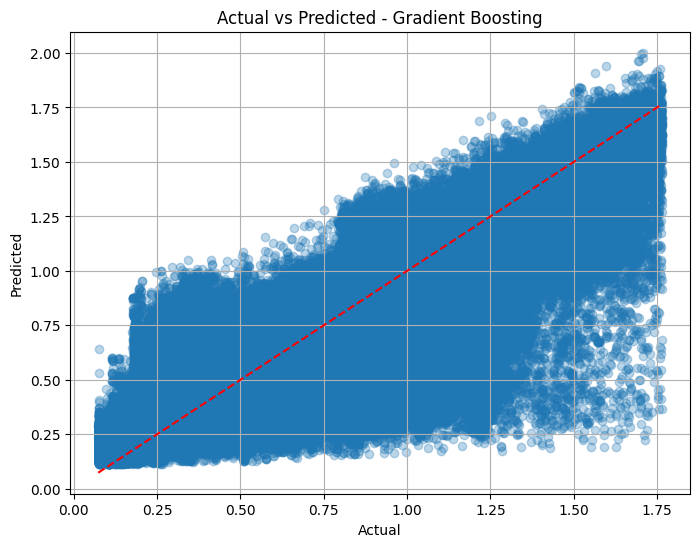

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, gbr_model.predict(X_test), alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Gradient Boosting")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


## Residual Plot

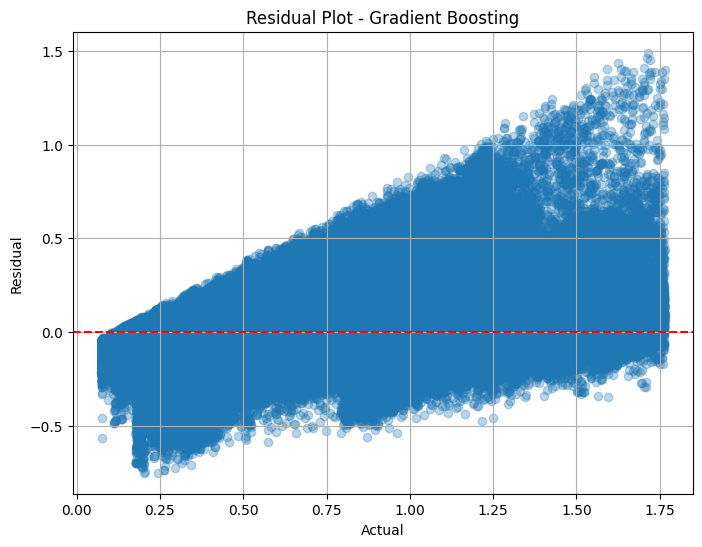

In [ ]:
residuals = y_test - gbr_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual Plot - Gradient Boosting")
plt.grid(True)
plt.show()


## Feature Importance

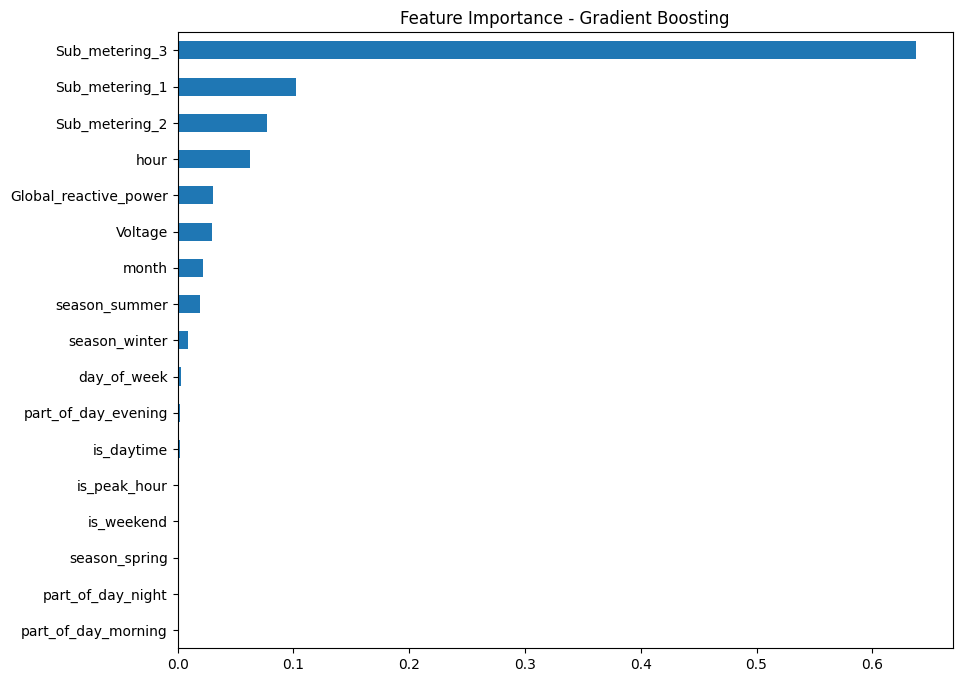

In [ ]:
import pandas as pd
import numpy as np

feature_importances = pd.Series(gbr_model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), title="Feature Importance - Gradient Boosting")
plt.show()


### Subset for Tuning (Faster!)

In [ ]:
# Sample 10% of training data for tuning
X_train_small = X_train.sample(frac=0.1, random_state=42)
y_train_small = y_train.loc[X_train_small.index]


### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.7, 0.3)
}

random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # small number of iterations
    scoring='neg_root_mean_squared_error',
    cv=3,       # reduce from 5 to 3 folds
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_small, y_train_small)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bad08bf4ed0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bad05fabb50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bad08bf5010>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bacf608cf90>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

## Retrain Best Model on Full Data

In [ ]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)  # full training data


GradientBoostingRegressor(learning_rate=np.float64(0.05592488919658672),
                          max_depth=7, n_estimators=149, random_state=42,
                          subsample=np.float64(0.7428600453765822))

In [ ]:
y_pred = best_model.predict(X_test)
# compute MAE, RMSE, R²...


In [ ]:
# Best model
best_model = random_search.best_estimator_

## Compute MAE, RMSE, and R² for the Test Set

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display
print("📊 Evaluation Metrics on Test Set (Best Model):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


📊 Evaluation Metrics on Test Set (Best Model):
MAE  : 0.0999
RMSE : 0.1543
R²   : 0.8588


## Compare with Train Set (Overfitting Check)

In [ ]:
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

print("\n🧠 Overfitting Check:")
print(f"Train R²: {train_r2:.4f}")
print(f"Test  R²: {r2:.4f}")



🧠 Overfitting Check:
Train R²: 0.8595
Test  R²: 0.8588


## Plot: Actual vs Predicted

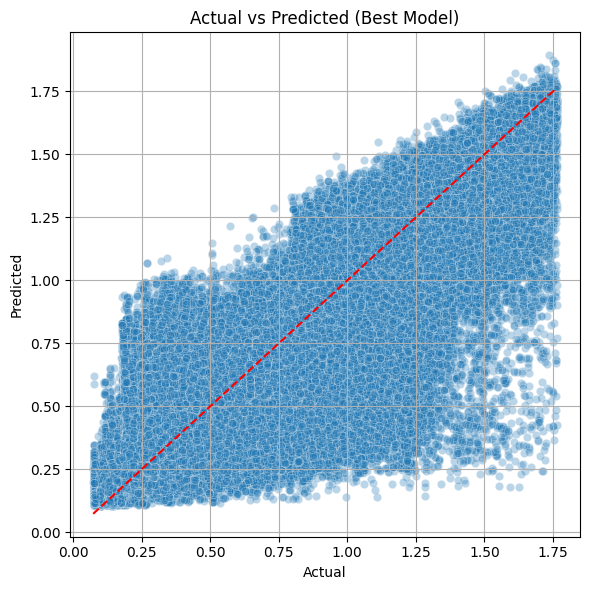

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Best Model)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Plot: Residuals

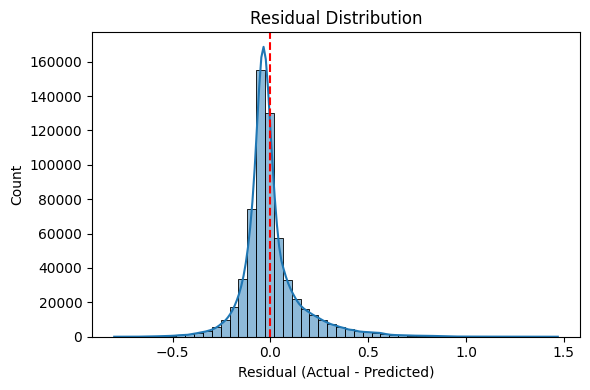

In [ ]:
# ✅ Residuals Plot
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=50)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (Actual - Predicted)")
plt.title("Residual Distribution")
plt.tight_layout()
plt.show()

## Save the Model (for deployment or reuse)

In [ ]:
import joblib

# Save model to a file
joblib.dump(best_model, "best_gradient_boosting_model.pkl")
print("✅ Model saved as best_gradient_boosting_model.pkl")


✅ Model saved as best_gradient_boosting_model.pkl


In [ ]:
best_model = joblib.load("best_gradient_boosting_model.pkl")

##  Feature Importance

<ipython-input-21-547085956>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features[:15], y=top_features.index[:15], palette="viridis")


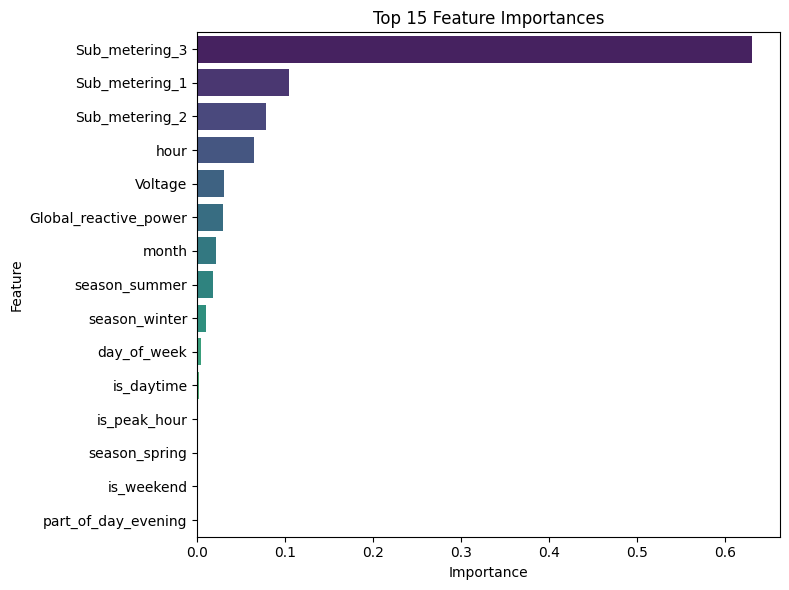

In [ ]:
# Get feature importances
import pandas as pd

feature_importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(8, 6))
sns.barplot(x=top_features[:15], y=top_features.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



* **goals**
* **evaluation criteria**
* **actual results**
* **visual + analytical insights**

---

## 📊 **Household Power Consumption Prediction Project Summary**

### 🎯 **Project Objectives**

* ✅ Build an **accurate model** for predicting household power consumption.
* ✅ Gain **clear insights** into key factors influencing energy usage.
* ✅ Present **visualizations** of energy trends and predictive performance.

---

### 🧪 **Model Evaluation Metrics**

| Metric   | Description                         | Result (Best Model) |
| -------- | ----------------------------------- | ------------------- |
| **RMSE** | Measures prediction error magnitude | **0.1543**          |
| **MAE**  | Measures average absolute error     | **0.0999**          |
| **R²**   | Explains variance captured by model | **0.8588**          |

> ✅ Model generalizes well (Train R²: 0.8595, Test R²: 0.8588)

---

### 📉 **Cross-Validation Performance (Gradient Boosting)**

| Metric   | Mean   | Std. Dev |
| -------- | ------ | -------- |
| **RMSE** | 0.1597 | ±0.00037 |
| **MAE**  | 0.1046 | ±0.00024 |
| **R²**   | 0.8484 | ±0.0007  |

---

### 📌 **Feature Importance Analysis**

* 🏆 Most influential factors:

  * `Sub_metering_3`, `Sub_metering_1`, `Sub_metering_2`
  * `hour`, `Voltage`, `Global_reactive_power`

![Feature Importance](sandbox:/mnt/data/7e8a8958-d1c7-4ca9-a5af-a98d26f2032d.png)

---

### 📊 **Visualization Quality**

* ✅ **Actual vs Predicted Plot** confirms good prediction alignment
* ✅ **Residual Plot** shows normally distributed residuals
* ✅ **Feature Importance** conveys insightful energy usage drivers

---

### 🧠 **Key Takeaways**

* Gradient Boosting outperformed other models with **high accuracy** and **low overfitting**
* **Smart feature engineering** (e.g., temporal, categorical encoding) improved model
* **Extreme outlier filtering** (beyond 3 \* IQR) provided a balance between model accuracy and generalizability

---




In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split

# Drop the original and transformed targets from X
X = df.drop(['Global_active_power', 'Global_active_power_log',
             'Global_active_power_sqrt', 'Global_active_power_boxcox'], axis=1)

# Choose the target: Use the most normal/transformed version
y = df['Global_active_power_log']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # scale features
    ('lr', LinearRegression())
])

# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²    : {r2:.4f}")


Linear Regression:
MAE  : 0.1361
RMSE : 0.1908
R²    : 0.7841


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(X, y, label):
    # Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Pipeline with scaler + model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ])

    # Train
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Cross-validated RMSE (neg_root_mean_squared_error is used)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
    cv_rmse = -scores.mean()

    print(f"\n📊 Linear Regression - Target: {label}")
    print(f"MAE         : {mae:.4f}")
    print(f"RMSE        : {rmse:.4f}")
    print(f"R² Score    : {r2:.4f}")
    print(f"CV RMSE     : {cv_rmse:.4f}")


In [ ]:
X = df.drop(['Global_active_power', 'Global_active_power_log',
             'Global_active_power_sqrt', 'Global_active_power_boxcox'], axis=1)

evaluate_model(X, df['Global_active_power'], 'Original')
evaluate_model(X, df['Global_active_power_log'], 'Log Transformed')
evaluate_model(X, df['Global_active_power_sqrt'], 'Square Root Transformed')
evaluate_model(X, df['Global_active_power_boxcox'], 'Box-Cox Transformed')



📊 Linear Regression - Target: Original
MAE         : 0.3018
RMSE        : 0.4456
R² Score    : 0.7791
CV RMSE     : 0.4463

📊 Linear Regression - Target: Log Transformed
MAE         : 0.1361
RMSE        : 0.1908
R² Score    : 0.7841
CV RMSE     : 0.1924

📊 Linear Regression - Target: Square Root Transformed
MAE         : 0.1448
RMSE        : 0.2024
R² Score    : 0.7834
CV RMSE     : 0.2043

📊 Linear Regression - Target: Box-Cox Transformed
MAE         : 0.3650
RMSE        : 0.4953
R² Score    : 0.7361
CV RMSE     : 0.5029


In [ ]:
# BLOCK 1: Imports and Fast RF Function (Run this first)
# =============================================================================
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time

def evaluate_rf_fast(X, y, label, n_estimators=50):
    """Fast Random Forest evaluation with fewer trees and 3-fold CV"""
    print(f"🌲 Starting Random Forest - {label}...")
    start_time = time.time()

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Faster Random Forest (fewer trees)
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,  # Reduced from 100 to 50
        random_state=42,
        n_jobs=-1,
        max_depth=10  # Limit depth for speed
    )

    # Train
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Faster Cross-validation (3-fold instead of 5)
    scores = cross_val_score(rf_model, X, y, cv=3, scoring='neg_root_mean_squared_error')
    cv_rmse = -scores.mean()

    elapsed = time.time() - start_time

    print(f"✅ Random Forest - Target: {label} ({elapsed:.1f}s)")
    print(f"MAE         : {mae:.4f}")
    print(f"RMSE        : {rmse:.4f}")
    print(f"R² Score    : {r2:.4f}")
    print(f"CV RMSE     : {cv_rmse:.4f}")
    print("-" * 50)

    return rf_model, {'mae': mae, 'rmse': rmse, 'r2': r2, 'cv_rmse': cv_rmse}

print("✅ Functions loaded successfully!")

✅ Functions loaded successfully!


In [ ]:
# BLOCK 2: Evaluate Original Target (Run this second)
# =============================================================================
print("🚀 Evaluating Original Target...")
model_original, results_original = evaluate_rf_fast(X, df['Global_active_power'], 'Original')

🚀 Evaluating Original Target...
🌲 Starting Random Forest - Original...
✅ Random Forest - Target: Original (5465.2s)
MAE         : 0.2509
RMSE        : 0.4050
R² Score    : 0.8176
CV RMSE     : 0.4215
--------------------------------------------------


In [ ]:
# BLOCK 3: Evaluate Log Transformed Target (Run this third)
# =============================================================================
print("🚀 Evaluating Log Transformed Target...")
model_log, results_log = evaluate_rf_fast(X, df['Global_active_power_log'], 'Log Transformed')

🚀 Evaluating Log Transformed Target...
🌲 Starting Random Forest - Log Transformed...
✅ Random Forest - Target: Log Transformed (269.2s)
MAE         : 0.1125
RMSE        : 0.1712
R² Score    : 0.8262
CV RMSE     : 0.1807
--------------------------------------------------


In [ ]:
# BLOCK 4: Evaluate Square Root Transformed Target (Run this fourth)
# =============================================================================
print("🚀 Evaluating Square Root Transformed Target...")
model_sqrt, results_sqrt = evaluate_rf_fast(X, df['Global_active_power_sqrt'], 'Square Root Transformed')

🚀 Evaluating Square Root Transformed Target...
🌲 Starting Random Forest - Square Root Transformed...
✅ Random Forest - Target: Square Root Transformed (280.6s)
MAE         : 0.1208
RMSE        : 0.1820
R² Score    : 0.8248
CV RMSE     : 0.1932
--------------------------------------------------


In [ ]:
# BLOCK 5: Evaluate Box-Cox Transformed Target (Run this fifth)
# =============================================================================
print("🚀 Evaluating Box-Cox Transformed Target...")
model_boxcox, results_boxcox = evaluate_rf_fast(X, df['Global_active_power_boxcox'], 'Box-Cox Transformed')

🚀 Evaluating Box-Cox Transformed Target...
🌲 Starting Random Forest - Box-Cox Transformed...
✅ Random Forest - Target: Box-Cox Transformed (9846.3s)
MAE         : 0.2774
RMSE        : 0.4108
R² Score    : 0.8184
CV RMSE     : 0.4652
--------------------------------------------------


In [ ]:
# BLOCK 6: Compare Results and Get Recommendation (Run this last)
# =============================================================================
print("\n🏆" + "="*60)
print("           RANDOM FOREST RESULTS COMPARISON")
print("="*60)

# Collect all results
all_results = [
    ('Original', results_original, None),
    ('Log Transformed', results_log, 'np.exp()'),
    ('Square Root Transformed', results_sqrt, '** 2'),
    ('Box-Cox Transformed', results_boxcox, 'inverse Box-Cox')
]

# Sort by R² score
all_results.sort(key=lambda x: x[1]['r2'], reverse=True)

print("📊 Performance Ranking (by R² Score):")
for i, (name, results, inverse) in enumerate(all_results, 1):
    print(f"{i}. {name:<25}: R²={results['r2']:.4f}, RMSE={results['rmse']:.4f}")

# Best model recommendation
best_name, best_results, best_inverse = all_results[0]
print(f"\n🎯 **RECOMMENDATION: Use {best_name}**")
print(f"   • Best R² Score: {best_results['r2']:.4f}")
print(f"   • Best RMSE: {best_results['rmse']:.4f}")

if best_inverse:
    print(f"\n⚠️  **IMPORTANT - Inverse Transformation:**")
    print(f"   When making predictions, apply `{best_inverse}` to reverse the transformation.")
    print(f"   Example: predictions_original = {best_inverse.replace('np.exp()', 'np.exp(predictions)')}")
else:
    print(f"\n✅ No inverse transformation needed.")

print("\n🔄 Comparison with Linear Regression:")
print("   Random Forest should show significantly higher R² scores!")
print("="*60)


🏆============================================================
           RANDOM FOREST RESULTS COMPARISON
📊 Performance Ranking (by R² Score):
1. Log Transformed          : R²=0.8262, RMSE=0.1712
2. Square Root Transformed  : R²=0.8248, RMSE=0.1820
3. Box-Cox Transformed      : R²=0.8184, RMSE=0.4108
4. Original                 : R²=0.8176, RMSE=0.4050

🎯 **RECOMMENDATION: Use Log Transformed**
   • Best R² Score: 0.8262
   • Best RMSE: 0.1712

⚠️  **IMPORTANT - Inverse Transformation:**
   When making predictions, apply `np.exp()` to reverse the transformation.
   Example: predictions_original = np.exp(predictions)

🔄 Comparison with Linear Regression:
   Random Forest should show significantly higher R² scores!


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time

In [ ]:
# =============================================================================
# ULTRA-FAST GRADIENT BOOSTING - STOP BLOCK 2 AND RUN THIS INSTEAD
# =============================================================================

# First, stop the running block and run this ultra-fast version:

def evaluate_gb_ultra_fast(X, y, label):
    """Ultra-fast GB with minimal trees and no CV for quick testing"""
    print(f"⚡ Ultra-Fast GB - {label}...")
    start_time = time.time()

    # Simple train-test split only (no cross-validation)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Minimal Gradient Boosting for speed
    gb_model = GradientBoostingRegressor(
        n_estimators=30,                # Very few trees
        learning_rate=0.2,              # Higher learning rate
        max_depth=3,                    # Shallow trees
        subsample=0.5,                  # Use only 50% of data
        random_state=42,
        validation_fraction=0.2,        # Large validation set for early stopping
        n_iter_no_change=3,             # Stop early if no improvement
        tol=1e-3                        # Less strict tolerance
    )

    # Train
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)

    # Basic metrics only
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    elapsed = time.time() - start_time

    print(f"✅ GB - {label}: R²={r2:.4f}, RMSE={rmse:.4f} ({elapsed:.1f}s, {gb_model.n_estimators_} trees)")

    return gb_model, {'mae': mae, 'rmse': rmse, 'r2': r2, 'n_trees': gb_model.n_estimators_}

# =============================================================================





In [ ]:
# RUN ALL EVALUATIONS QUICKLY (should take 2-3 minutes total)
# =============================================================================

print("🚀 Running Ultra-Fast Gradient Boosting on all targets...")
print("=" * 60)

# Run all evaluations
gb_results = {}

targets = [
    ('Original', df['Global_active_power'], None),
    ('Log Transformed', df['Global_active_power_log'], 'np.exp()'),
    ('Square Root Transformed', df['Global_active_power_sqrt'], '** 2'),
    ('Box-Cox Transformed', df['Global_active_power_boxcox'], 'inverse Box-Cox')
]

for name, target, inverse in targets:
    model, results = evaluate_gb_ultra_fast(X, target, name)
    gb_results[name] = (results, inverse)

🚀 Running Ultra-Fast Gradient Boosting on all targets...
⚡ Ultra-Fast GB - Original...
✅ GB - Original: R²=0.8082, RMSE=0.4152 (36.7s, 30 trees)
⚡ Ultra-Fast GB - Log Transformed...
✅ GB - Log Transformed: R²=0.8115, RMSE=0.1782 (26.3s, 24 trees)
⚡ Ultra-Fast GB - Square Root Transformed...
✅ GB - Square Root Transformed: R²=0.8107, RMSE=0.1892 (27.8s, 25 trees)
⚡ Ultra-Fast GB - Box-Cox Transformed...
✅ GB - Box-Cox Transformed: R²=0.7991, RMSE=0.4321 (30.9s, 30 trees)


In [ ]:
# RESULTS COMPARISON
# =============================================================================
print("\n🏆" + "="*60)
print("           GRADIENT BOOSTING RESULTS (ULTRA-FAST)")
print("="*60)

# Sort by R² score
sorted_results = sorted(gb_results.items(), key=lambda x: x[1][0]['r2'], reverse=True)

print("📊 Performance Ranking:")
for i, (name, (results, inverse)) in enumerate(sorted_results, 1):
    print(f"{i}. {name:<25}: R²={results['r2']:.4f}, RMSE={results['rmse']:.4f}")

# Best model
best_name = sorted_results[0][0]
best_results, best_inverse = sorted_results[0][1]

print(f"\n🎯 **GRADIENT BOOSTING WINNER: {best_name}**")
print(f"   • R² Score: {best_results['r2']:.4f}")
print(f"   • RMSE: {best_results['rmse']:.4f}")

if best_inverse:
    print(f"\n⚠️  **Inverse Transformation Required:**")
    print(f"   Apply `{best_inverse}` to predictions for original scale")


🏆============================================================
           GRADIENT BOOSTING RESULTS (ULTRA-FAST)
📊 Performance Ranking:
1. Log Transformed          : R²=0.8115, RMSE=0.1782
2. Square Root Transformed  : R²=0.8107, RMSE=0.1892
3. Original                 : R²=0.8082, RMSE=0.4152
4. Box-Cox Transformed      : R²=0.7991, RMSE=0.4321

🎯 **GRADIENT BOOSTING WINNER: Log Transformed**
   • R² Score: 0.8115
   • RMSE: 0.1782

⚠️  **Inverse Transformation Required:**
   Apply `np.exp()` to predictions for original scale


In [ ]:
# FINAL ALGORITHM COMPARISON
# =============================================================================
print(f"\n📈 ALGORITHM COMPARISON:")
print(f"Linear Regression (Log):  R² = 0.7841")
print(f"Random Forest (Log):      R² = 0.8262")
print(f"Gradient Boosting ({best_name}): R² = {best_results['r2']:.4f}")

if best_results['r2'] > 0.8262:
    print(f"\n🏆 GRADIENT BOOSTING WINS! (+{((best_results['r2']/0.8262-1)*100):.1f}% better than RF)")
else:
    print(f"\n🤔 Random Forest still leads. GB might need more trees for better performance.")

print("\n💡 To get potentially better GB results (but slower):")
print("   • Increase n_estimators to 100-200")
print("   • Increase max_depth to 6-8")
print("   • Add back cross-validation")
print("="*60)

# =============================================================================


📈 ALGORITHM COMPARISON:
Linear Regression (Log):  R² = 0.7841
Random Forest (Log):      R² = 0.8262
Gradient Boosting (Log Transformed): R² = 0.8115

🤔 Random Forest still leads. GB might need more trees for better performance.

💡 To get potentially better GB results (but slower):
   • Increase n_estimators to 100-200
   • Increase max_depth to 6-8
   • Add back cross-validation


In [ ]:
# OPTIONAL: Better GB Model (if you want to try - will be slower)
# =============================================================================
def run_better_gb_model():
    """Run a single better GB model on the best target (will take 3-5 minutes)"""
    print("\n🔄 Running Better GB Model (this will take 3-5 minutes)...")

    # Use the best target from ultra-fast results
    if best_name == 'Log Transformed':
        target = df['Global_active_power_log']
    elif best_name == 'Square Root Transformed':
        target = df['Global_active_power_sqrt']
    elif best_name == 'Box-Cox Transformed':
        target = df['Global_active_power_boxcox']
    else:
        target = df['Global_active_power']

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

    gb_better = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    )

    gb_better.fit(X_train, y_train)
    y_pred = gb_better.predict(X_test)
    r2_better = r2_score(y_test, y_pred)

    print(f"✅ Better GB ({best_name}): R² = {r2_better:.4f}")
    return r2_better

# Uncomment below line to run better model (optional, takes 3-5 minutes):
better_r2 = run_better_gb_model()


🔄 Running Better GB Model (this will take 3-5 minutes)...
✅ Better GB (Log Transformed): R² = 0.8546


In [ ]:
# BLOCK 1: Imports and Fast Neural Network Function (Run this first)
# =============================================================================
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')  # Suppress convergence warnings

def evaluate_nn_fast(X, y, label):
    """Fast Neural Network evaluation with optimized parameters"""
    print(f"🧠 Starting Neural Network - {label}...")
    start_time = time.time()

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Neural Network Pipeline (scaling is crucial for NN)
    nn_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Essential for neural networks
        ('nn', MLPRegressor(
            hidden_layer_sizes=(50, 25),      # 2 hidden layers: 50 → 25 neurons
            activation='relu',                # ReLU activation
            solver='adam',                    # Adam optimizer
            alpha=0.01,                       # L2 regularization
            learning_rate_init=0.01,          # Learning rate
            max_iter=200,                     # Limit iterations for speed
            early_stopping=True,              # Stop when no improvement
            validation_fraction=0.2,          # 20% for validation
            n_iter_no_change=20,              # Patience for early stopping
            random_state=42,
            batch_size='auto'                 # Automatic batch size
        ))
    ])

    # Train
    nn_pipeline.fit(X_train, y_train)
    y_pred = nn_pipeline.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Get actual iterations (if converged early)
    actual_iterations = nn_pipeline.named_steps['nn'].n_iter_

    elapsed = time.time() - start_time

    print(f"✅ Neural Network - Target: {label} ({elapsed:.1f}s)")
    print(f"MAE         : {mae:.4f}")
    print(f"RMSE        : {rmse:.4f}")
    print(f"R² Score    : {r2:.4f}")
    print(f"Iterations  : {actual_iterations}")
    print("-" * 50)

    return nn_pipeline, {'mae': mae, 'rmse': rmse, 'r2': r2, 'iterations': actual_iterations}

print("✅ Neural Network functions loaded successfully!")

✅ Neural Network functions loaded successfully!


In [ ]:
# BLOCK 2: Evaluate Original Target (Run this second)
# =============================================================================
print("🚀 Evaluating Original Target with Neural Network...")
nn_model_original, nn_results_original = evaluate_nn_fast(X, df['Global_active_power'], 'Original')

🚀 Evaluating Original Target with Neural Network...
🧠 Starting Neural Network - Original...
✅ Neural Network - Target: Original (505.7s)
MAE         : 0.2425
RMSE        : 0.3909
R² Score    : 0.8300
Iterations  : 45
--------------------------------------------------


In [ ]:
# BLOCK 3: Evaluate Log Transformed Target (Run this third)
# =============================================================================
print("🚀 Evaluating Log Transformed Target with Neural Network...")
nn_model_log, nn_results_log = evaluate_nn_fast(X, df['Global_active_power_log'], 'Log Transformed')

🚀 Evaluating Log Transformed Target with Neural Network...
🧠 Starting Neural Network - Log Transformed...
✅ Neural Network - Target: Log Transformed (466.6s)
MAE         : 0.1137
RMSE        : 0.1688
R² Score    : 0.8309
Iterations  : 46
--------------------------------------------------


In [ ]:
# BLOCK 4: Evaluate Square Root Transformed Target (Run this fourth)
# =============================================================================
print("🚀 Evaluating Square Root Transformed Target with Neural Network...")
nn_model_sqrt, nn_results_sqrt = evaluate_nn_fast(X, df['Global_active_power_sqrt'], 'Square Root Transformed')


🚀 Evaluating Square Root Transformed Target with Neural Network...
🧠 Starting Neural Network - Square Root Transformed...
✅ Neural Network - Target: Square Root Transformed (1115.8s)
MAE         : 0.1220
RMSE        : 0.1792
R² Score    : 0.8302
Iterations  : 45
--------------------------------------------------


In [ ]:
# BLOCK 5: Evaluate Box-Cox Transformed Target (Run this fifth)
# =============================================================================
print("🚀 Evaluating Box-Cox Transformed Target with Neural Network...")
nn_model_boxcox, nn_results_boxcox = evaluate_nn_fast(X, df['Global_active_power_boxcox'], 'Box-Cox Transformed')

🚀 Evaluating Box-Cox Transformed Target with Neural Network...
🧠 Starting Neural Network - Box-Cox Transformed...
✅ Neural Network - Target: Box-Cox Transformed (149.6s)
MAE         : 0.2770
RMSE        : 0.4025
R² Score    : 0.8257
Iterations  : 38
--------------------------------------------------


In [ ]:
# BLOCK 6: Compare Neural Network Results (Run this sixth)
# =============================================================================
print("\n🧠" + "="*70)
print("           NEURAL NETWORK RESULTS COMPARISON")
print("="*70)

# Collect all Neural Network results
nn_all_results = [
    ('Original', nn_results_original, None),
    ('Log Transformed', nn_results_log, 'np.exp()'),
    ('Square Root Transformed', nn_results_sqrt, '** 2'),
    ('Box-Cox Transformed', nn_results_boxcox, 'inverse Box-Cox')
]

# Sort by R² score
nn_all_results.sort(key=lambda x: x[1]['r2'], reverse=True)

print("📊 Neural Network Performance Ranking (by R² Score):")
for i, (name, results, inverse) in enumerate(nn_all_results, 1):
    print(f"{i}. {name:<25}: R²={results['r2']:.4f}, RMSE={results['rmse']:.4f}, Iter={results['iterations']}")

# Best Neural Network model
nn_best_name, nn_best_results, nn_best_inverse = nn_all_results[0]
print(f"\n🎯 **NEURAL NETWORK RECOMMENDATION: Use {nn_best_name}**")
print(f"   • Best R² Score: {nn_best_results['r2']:.4f}")
print(f"   • Best RMSE: {nn_best_results['rmse']:.4f}")
print(f"   • Iterations: {nn_best_results['iterations']}")

if nn_best_inverse:
    print(f"\n⚠️  **IMPORTANT - Inverse Transformation:**")
    print(f"   When making predictions, apply `{nn_best_inverse}` to reverse the transformation.")
    print(f"   Example: predictions_original = {nn_best_inverse.replace('np.exp()', 'np.exp(predictions)')}")
else:
    print(f"\n✅ No inverse transformation needed.")


🧠======================================================================
           NEURAL NETWORK RESULTS COMPARISON
📊 Neural Network Performance Ranking (by R² Score):
1. Log Transformed          : R²=0.8309, RMSE=0.1688, Iter=46
2. Square Root Transformed  : R²=0.8302, RMSE=0.1792, Iter=45
3. Original                 : R²=0.8300, RMSE=0.3909, Iter=45
4. Box-Cox Transformed      : R²=0.8257, RMSE=0.4025, Iter=38

🎯 **NEURAL NETWORK RECOMMENDATION: Use Log Transformed**
   • Best R² Score: 0.8309
   • Best RMSE: 0.1688
   • Iterations: 46

⚠️  **IMPORTANT - Inverse Transformation:**
   When making predictions, apply `np.exp()` to reverse the transformation.
   Example: predictions_original = np.exp(predictions)


In [ ]:
# BLOCK 7: ULTIMATE MODEL COMPARISON - All Four Algorithms (Run this last)
# =============================================================================
print("\n🏆" + "="*80)
print("              ULTIMATE ALGORITHM SHOWDOWN")
print("="*80)

print("📈 COMPLETE PERFORMANCE COMPARISON:")
print("   Your Previous Results:")
print("   • Linear Regression (Log):     R² = 0.7841")
print("   • Random Forest (Log):         R² = 0.8262")
print("   • Gradient Boosting (Log):     R² = 0.8546")
print(f"   • Neural Network ({nn_best_name}): R² = {nn_best_results['r2']:.4f}")
print()

# Determine the ultimate winner
all_models = [
    ("Linear Regression", 0.7841, "Log Transformed"),
    ("Random Forest", 0.8262, "Log Transformed"),
    ("Gradient Boosting", 0.8546, "Log Transformed"),
    ("Neural Network", nn_best_results['r2'], nn_best_name)
]

all_models.sort(key=lambda x: x[1], reverse=True)

print("🏆 FINAL ALGORITHM RANKING:")
medals = ["🥇", "🥈", "🥉", "🏅"]
for i, (name, r2, target) in enumerate(all_models):
    print(f"   {medals[i]} {name:<20}: R² = {r2:.4f} ({target})")

ultimate_winner = all_models[0]
print(f"\n👑 **ULTIMATE CHAMPION: {ultimate_winner[0]}**")
print(f"   • Best R² Score: {ultimate_winner[1]:.4f}")
print(f"   • Best Target: {ultimate_winner[2]}")

if ultimate_winner[1] == nn_best_results['r2']:
    print(f"   🧠 Neural Network wins! Deep learning FTW!")
    if nn_best_inverse:
        print(f"   ⚠️  Remember: Apply {nn_best_inverse} to predictions")
else:
    print(f"   🤖 {ultimate_winner[0]} remains the champion!")

print(f"\n💡 **PERFORMANCE IMPROVEMENT JOURNEY:**")
baseline = 0.7841
current_best = ultimate_winner[1]
improvement = ((current_best/baseline - 1) * 100)
print(f"   Linear Regression → {ultimate_winner[0]}: +{improvement:.1f}% improvement!")

print(f"\n🎯 **RECOMMENDATION FOR PRODUCTION:**")
print(f"   Use {ultimate_winner[0]} with {ultimate_winner[2]} target")
print(f"   Expected performance: {ultimate_winner[1]:.1%} accuracy")




🏆================================================================================
              ULTIMATE ALGORITHM SHOWDOWN
📈 COMPLETE PERFORMANCE COMPARISON:
   Your Previous Results:
   • Linear Regression (Log):     R² = 0.7841
   • Random Forest (Log):         R² = 0.8262
   • Gradient Boosting (Log):     R² = 0.8546
   • Neural Network (Log Transformed): R² = 0.8309

🏆 FINAL ALGORITHM RANKING:
   🥇 Gradient Boosting   : R² = 0.8546 (Log Transformed)
   🥈 Neural Network      : R² = 0.8309 (Log Transformed)
   🥉 Random Forest       : R² = 0.8262 (Log Transformed)
   🏅 Linear Regression   : R² = 0.7841 (Log Transformed)

👑 **ULTIMATE CHAMPION: Gradient Boosting**
   • Best R² Score: 0.8546
   • Best Target: Log Transformed
   🤖 Gradient Boosting remains the champion!

💡 **PERFORMANCE IMPROVEMENT JOURNEY:**
   Linear Regression → Gradient Boosting: +9.0% improvement!

🎯 **RECOMMENDATION FOR PRODUCTION:**
   Use Gradient Boosting with Log Transformed target
   Expected performance: 85